In [201]:
# %pip install pandas
# %pip install matplotlib
# %pip install plotly
# %pip install scikit-learn
# %pip install seaborn
# %pip install statsmodels
# %pip install imblearn
# %pip install nbformat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns

In [202]:
#Read the data
asd = pd.read_csv('heart_2020_cleaned.csv', sep= ',', encoding= 'utf-8')
asd.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [203]:
asd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [204]:
# Check the nullity
asd.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

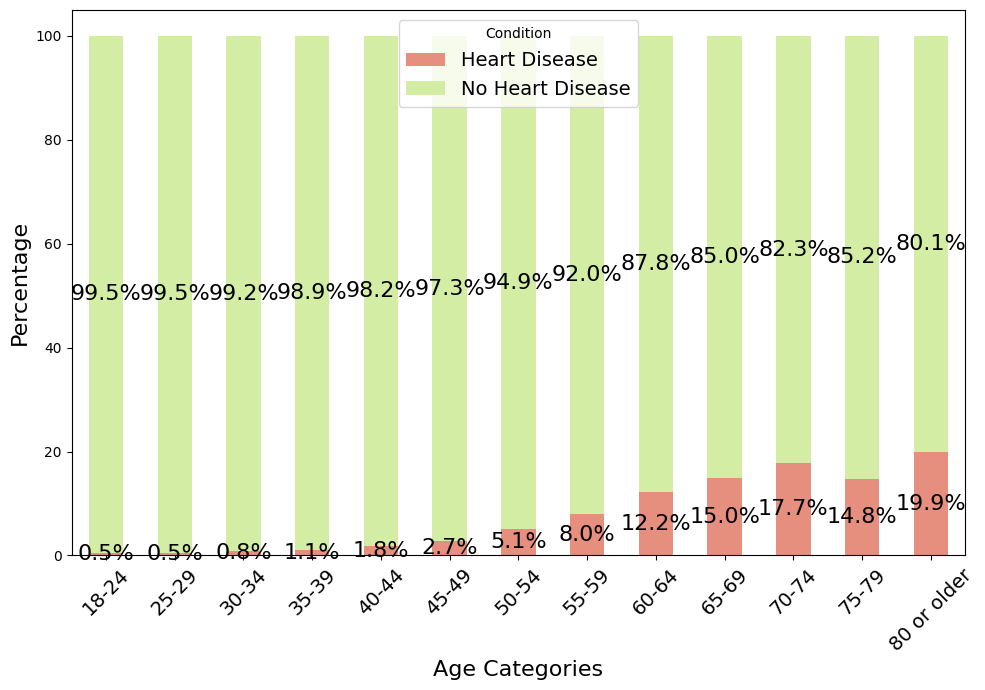

In [213]:
import matplotlib.pyplot as plt
import pandas as pd

age_category_counts = asd['AgeCategory'].value_counts(normalize=True) * 100 
age_category_counts_yes = asd[asd['HeartDisease'] == 'Yes']['AgeCategory'].value_counts(normalize=True) * 100 

age_category_counts.sort_index(inplace=True)
age_category_counts_yes.sort_index(inplace=True)

df_percentage = pd.DataFrame({
    'Heart Disease': age_category_counts_yes,
    'No Heart Disease': 100 - age_category_counts_yes
})

ax = df_percentage.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#E78F7F', '#D3EdA4'])

for c in ax.containers:
    labels = [f'{(v.get_height()):.1f}%' if (v.get_height() > 0) else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=16)

plt.xlabel('Age Categories', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.legend(title='Condition', fontsize=14)

plt.tight_layout()
plt.show()


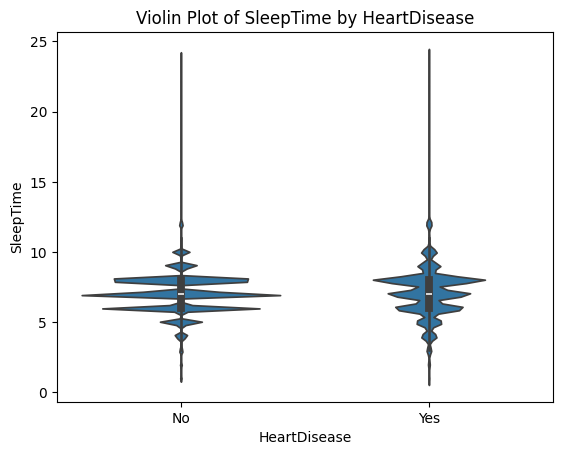

In [206]:
sns.violinplot(x='HeartDisease', y='SleepTime', data=asd)
plt.title('Violin Plot of SleepTime by HeartDisease')

plt.show()

/var/folders/x3/lh6nxy_j1dqgxn5w2rw_3b180000gn/T/ipykernel_35686/996854716.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y='MentalHealth', data=asd, palette=["#8BE8E5", "#FF0000"])


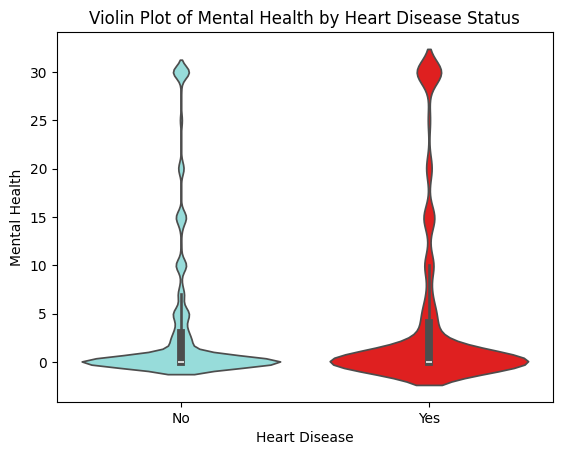

In [207]:
# Create a violin plot
sns.violinplot(x='HeartDisease', y='MentalHealth', data=asd, palette=["#8BE8E5", "#FF0000"])

# Adding titles and labels for clarity
plt.title('Violin Plot of Mental Health by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Mental Health')

# Display the plot
plt.show()

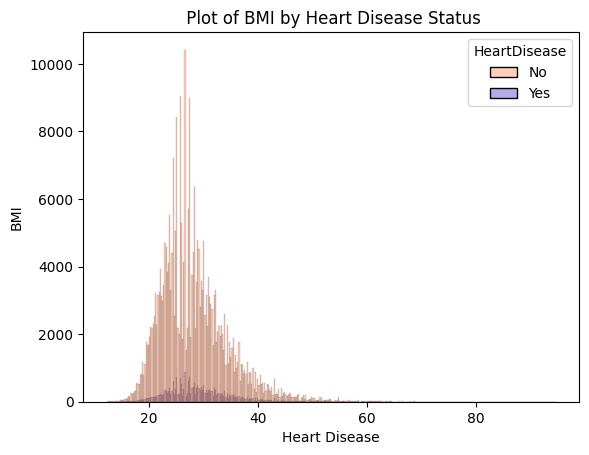

In [208]:
#  plot for BMI
sns.histplot(data=asd, x='BMI', hue='HeartDisease', palette=['#FFA07A', '#6A5ACD'])
plt.title(' Plot of BMI by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.show()

/var/folders/x3/lh6nxy_j1dqgxn5w2rw_3b180000gn/T/ipykernel_35686/139688145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y='PhysicalHealth', data=asd, palette=['#F0DE36', '#7A9D54'])


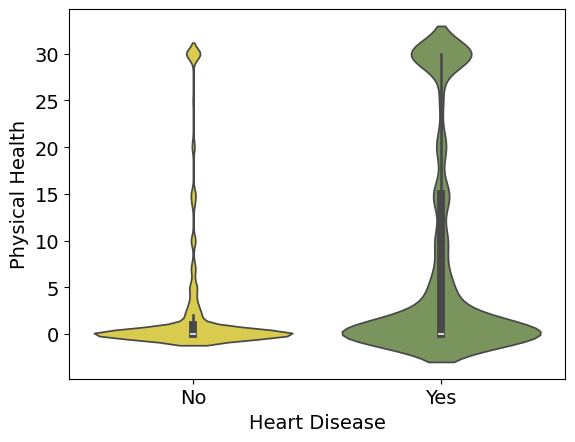

In [212]:
# Violin plot for PhysicalHealth
sns.violinplot(x='HeartDisease', y='PhysicalHealth', data=asd, palette=['#F0DE36', '#7A9D54'])
plt.xlabel('Heart Disease', fontsize=14)
plt.ylabel('Physical Health', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

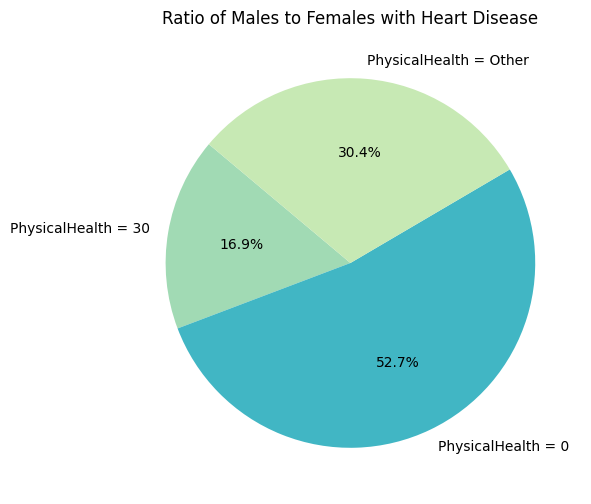

In [175]:
import matplotlib.pyplot as plt

heart_disease_data = asd[asd['HeartDisease'] == 'Yes']

data_30 = heart_disease_data[heart_disease_data['PhysicalHealth'] == 30.0].shape[0]
data_0 = heart_disease_data[heart_disease_data['PhysicalHealth'] == 0.0].shape[0]
data_other = heart_disease_data[(heart_disease_data['PhysicalHealth'] != 30.0) & (heart_disease_data['PhysicalHealth'] != 0.0)].shape[0]

data = [data_30, data_0, data_other]

colors = ['#a1dab4', '#41b6c4', '#c7e9b4']

plt.figure(figsize=(8, 6))
plt.pie(data, labels=['PhysicalHealth = 30', 'PhysicalHealth = 0', 'PhysicalHealth = Other'], colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Ratio of Males to Females with Heart Disease')

plt.show()


151990
167805


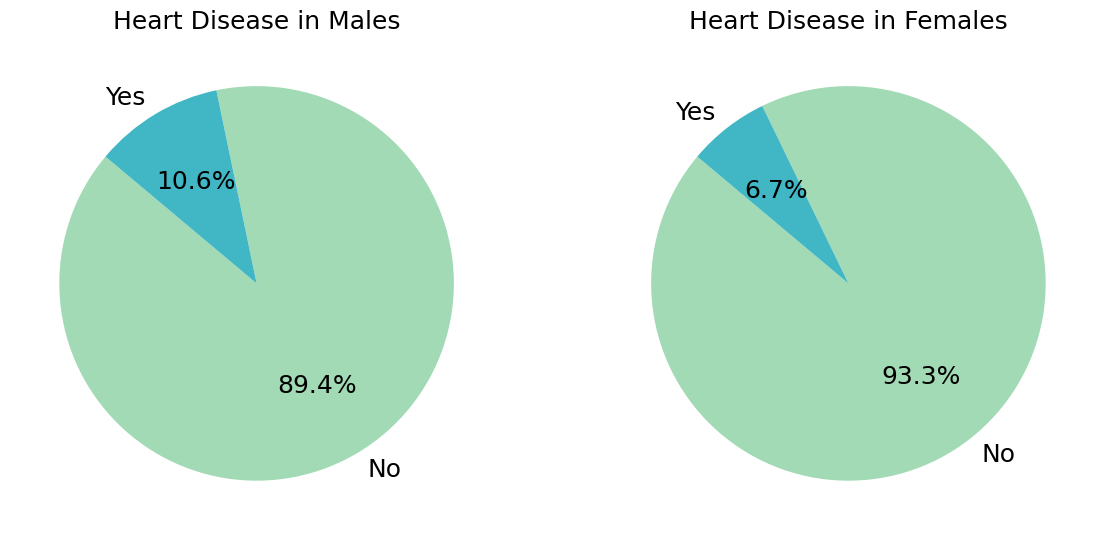

In [176]:
# Create separate pie charts for each sex
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Count the number of males and females in the dataset
male_count = asd[asd['Sex'] == 'Male'].shape[0]
female_count = asd[asd['Sex'] == 'Female'].shape[0]

print(male_count)
print(female_count)

# Filter data for males and females
male_data = asd[asd['Sex'] == 'Male']['HeartDisease'].value_counts()
female_data = asd[asd['Sex'] == 'Female']['HeartDisease'].value_counts()

# Male pie chart
axes[0].pie(male_data, labels=male_data.index, autopct='%1.1f%%', startangle=140, colors=['#a1dab4', '#41b6c4'], textprops={'fontsize': 18})
axes[0].set_title('Heart Disease in Males', fontsize=18)

# Female pie chart
axes[1].pie(female_data, labels=female_data.index, autopct='%1.1f%%', startangle=140, colors=['#a1dab4', '#41b6c4'], textprops={'fontsize': 18})
axes[1].set_title('Heart Disease in Females', fontsize=18)

plt.show()

Male      16139
Female    11234
Name: Sex, dtype: int64


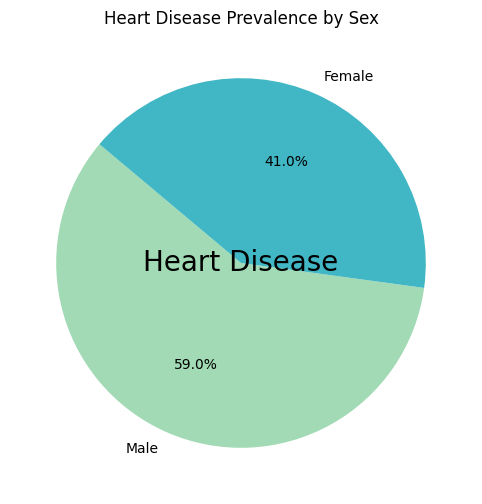

In [177]:
import matplotlib.pyplot as plt

# Filter the data for individuals with heart disease
heart_disease_data = asd[asd['HeartDisease'] == 'Yes']

# Calculate the count of males and females with heart disease
heart_disease_count = heart_disease_data['Sex'].value_counts()

print(heart_disease_count)

# Define two lighter colors
colors = ['#a1dab4', '#41b6c4']

# Create a pie chart to show the ratio with lighter colors
plt.figure(figsize=(8, 6))  # Set the figure size
plt.pie(heart_disease_count, labels=heart_disease_count.index, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Heart Disease Prevalence by Sex')
plt.annotate('Heart Disease', xy=(0, 0), xytext=(0.5, 0.5), textcoords='axes fraction', ha='center', va='center', fontsize=20)

plt.show()

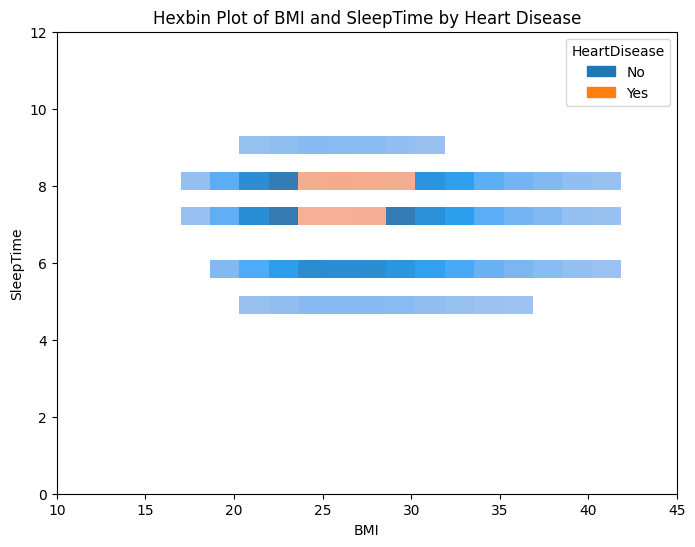

In [178]:
plt.figure(figsize=(8, 6))
# Adjusted the 'xtick' and 'ytick' parameters to limit the display range.
sns.histplot(data=asd, x="BMI", y="SleepTime", hue="HeartDisease", bins=50, pthresh=.1, cmap="YlGnBu")
plt.xlim(10, 45)  # Set the x-axis limit to show BMI up to 50
plt.ylim(0, 12)  # Set the y-axis limit to show Sleep Time up to 12 hours
plt.title("Hexbin Plot of BMI and SleepTime by Heart Disease")
plt.show()

0.0772236323006042
0.16700761259599584


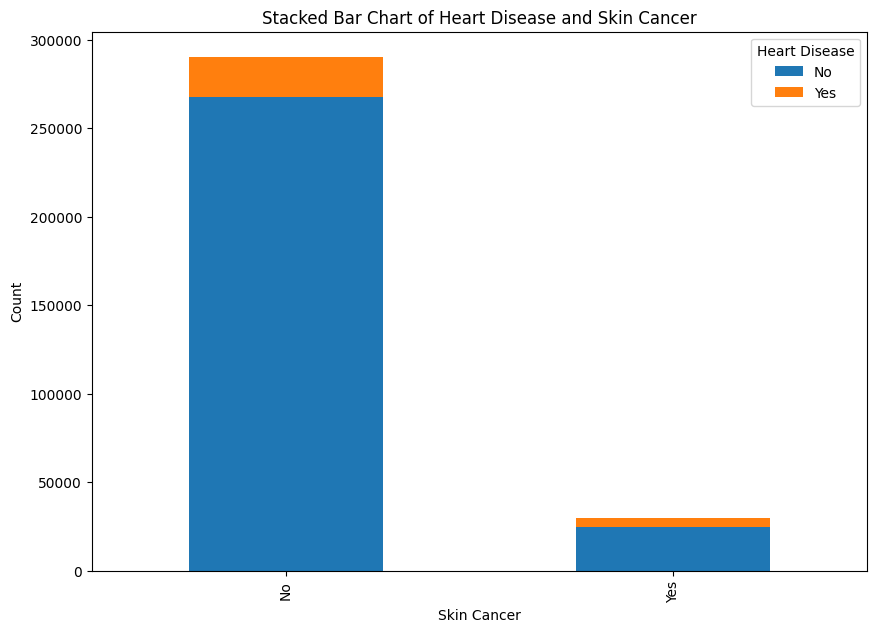

In [179]:
import matplotlib.pyplot as plt

non_skincancer_total = asd[asd['SkinCancer'] == 'No']['SkinCancer'].count()
non_skincancer_with_disease = asd[(asd['SkinCancer'] == 'No') & (asd['HeartDisease'] == 'Yes')]['SkinCancer'].count()

percentage3 = (non_skincancer_with_disease / non_skincancer_total)

print(percentage3)

skincancer_total = asd[asd['SkinCancer'] == 'Yes']['SkinCancer'].count()
skincancer_with_disease = asd[(asd['SkinCancer'] == 'Yes') & (asd['HeartDisease'] == 'Yes')]['SkinCancer'].count()

percentage4 = (skincancer_with_disease / skincancer_total)

print(percentage4)

asd_skincancer = asd.groupby('SkinCancer')['HeartDisease'].value_counts().reset_index(name='count')
pivot_df = asd_skincancer.pivot(index='SkinCancer', columns='HeartDisease', values='count')
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Stacked Bar Chart of Heart Disease and Skin Cancer')
plt.xlabel('Skin Cancer')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

0.08802152890093887
0.05239472838315654


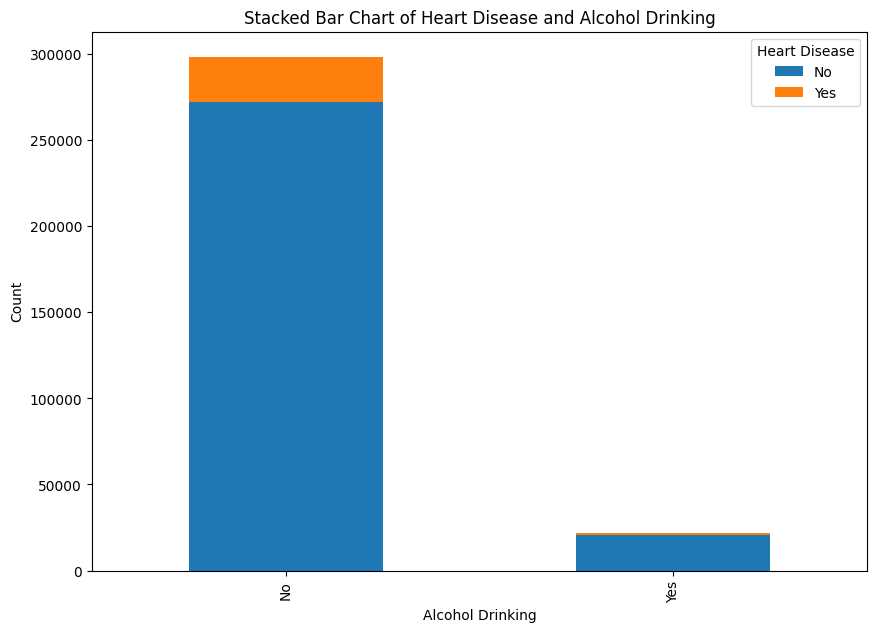

In [180]:
import matplotlib.pyplot as plt

non_drinkers_total = asd[asd['AlcoholDrinking'] == 'No']['AlcoholDrinking'].count()
non_drinkers_with_disease = asd[(asd['AlcoholDrinking'] == 'No') & (asd['HeartDisease'] == 'Yes')]['AlcoholDrinking'].count()

percentage1 = (non_drinkers_with_disease / non_drinkers_total)

print(percentage1)

drinkers_total = asd[asd['AlcoholDrinking'] == 'Yes']['AlcoholDrinking'].count()
drinkers_with_disease = asd[(asd['AlcoholDrinking'] == 'Yes') & (asd['HeartDisease'] == 'Yes')]['AlcoholDrinking'].count()

percentage2 = (drinkers_with_disease / drinkers_total)

print(percentage2)

asd_alcohol = asd.groupby('AlcoholDrinking')['HeartDisease'].value_counts().reset_index(name='count')
pivot_df_1 = asd_alcohol.pivot(index='AlcoholDrinking', columns='HeartDisease', values='count')
pivot_df_1.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Stacked Bar Chart of Heart Disease and Alcohol Drinking')
plt.xlabel('Alcohol Drinking')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

In [181]:
# Encoding Categorical Attributes

# Selecting all columns with object type data
object_cols = asd.select_dtypes(include=['object'])
print(object_cols.nunique())
binary_cols = object_cols.nunique() == 2
binary_features_list = binary_cols[binary_cols].index.tolist()
print(binary_features_list)

HeartDisease         2
Smoking              2
AlcoholDrinking      2
Stroke               2
DiffWalking          2
Sex                  2
AgeCategory         13
Race                 6
Diabetic             4
PhysicalActivity     2
GenHealth            5
Asthma               2
KidneyDisease        2
SkinCancer           2
dtype: int64
['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [182]:
# Reseting the asd index
asd = asd.reset_index(drop=True)

# binary_features_list is the list include column names with binary data
for col in binary_features_list:
    asd[col] = asd[col].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

# print(asd.head())
print(asd.info())

print(object_cols['AgeCategory'].unique())
print(object_cols['Race'].unique())
print(object_cols['Diabetic'].unique())
print(object_cols['GenHealth'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [183]:
# Replacing object-typed data with integer-typed data
asd['AgeCategory'] = asd['AgeCategory'].replace({'18-24': 21, '25-29': 27, '30-34': 32, '35-39': 37, '40-44': 42, '45-49': 47, '50-54': 52, '55-59': 57, '60-64': 62, '65-69': 67, '70-74': 72, '75-79': 77, '80 or older': 80})
asd['Diabetic'] = asd['Diabetic'].replace({'Yes': 1, 'No': 0, 'Yes (during pregnancy)': 1, 'No, borderline diabetes': 0})
asd['GenHealth'] = asd['GenHealth'].replace({'Poor': 1, 'Fair': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5})

# print(asd.head())
print(asd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [184]:
# Encoding Race with One-Hot encoder
from sklearn.preprocessing import OneHotEncoder

asd = asd.reset_index(drop=True)

encoder = OneHotEncoder()
transformed_Race = encoder.fit_transform(asd[['Race']])
transformed_Race_df = pd.DataFrame(transformed_Race.toarray()).astype(int)
columns = encoder.get_feature_names_out(['Race'])
transformed_Race_df.columns = columns

# Concatnating original dataframe and transformed dataframe
df_combined = pd.concat([asd, transformed_Race_df], axis=1)

# Deleting the original Race column
asd = df_combined.drop('Race', axis=1)

# print(asd.head())
print(asd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int64  
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int64  
 3   AlcoholDrinking                      319795 non-null  int64  
 4   Stroke                               319795 non-null  int64  
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  int64  
 8   Sex                                  319795 non-null  int64  
 9   AgeCategory                          319795 non-null  int64  
 10  Diabetic                             319795 non-null  int64  
 11  PhysicalActiv

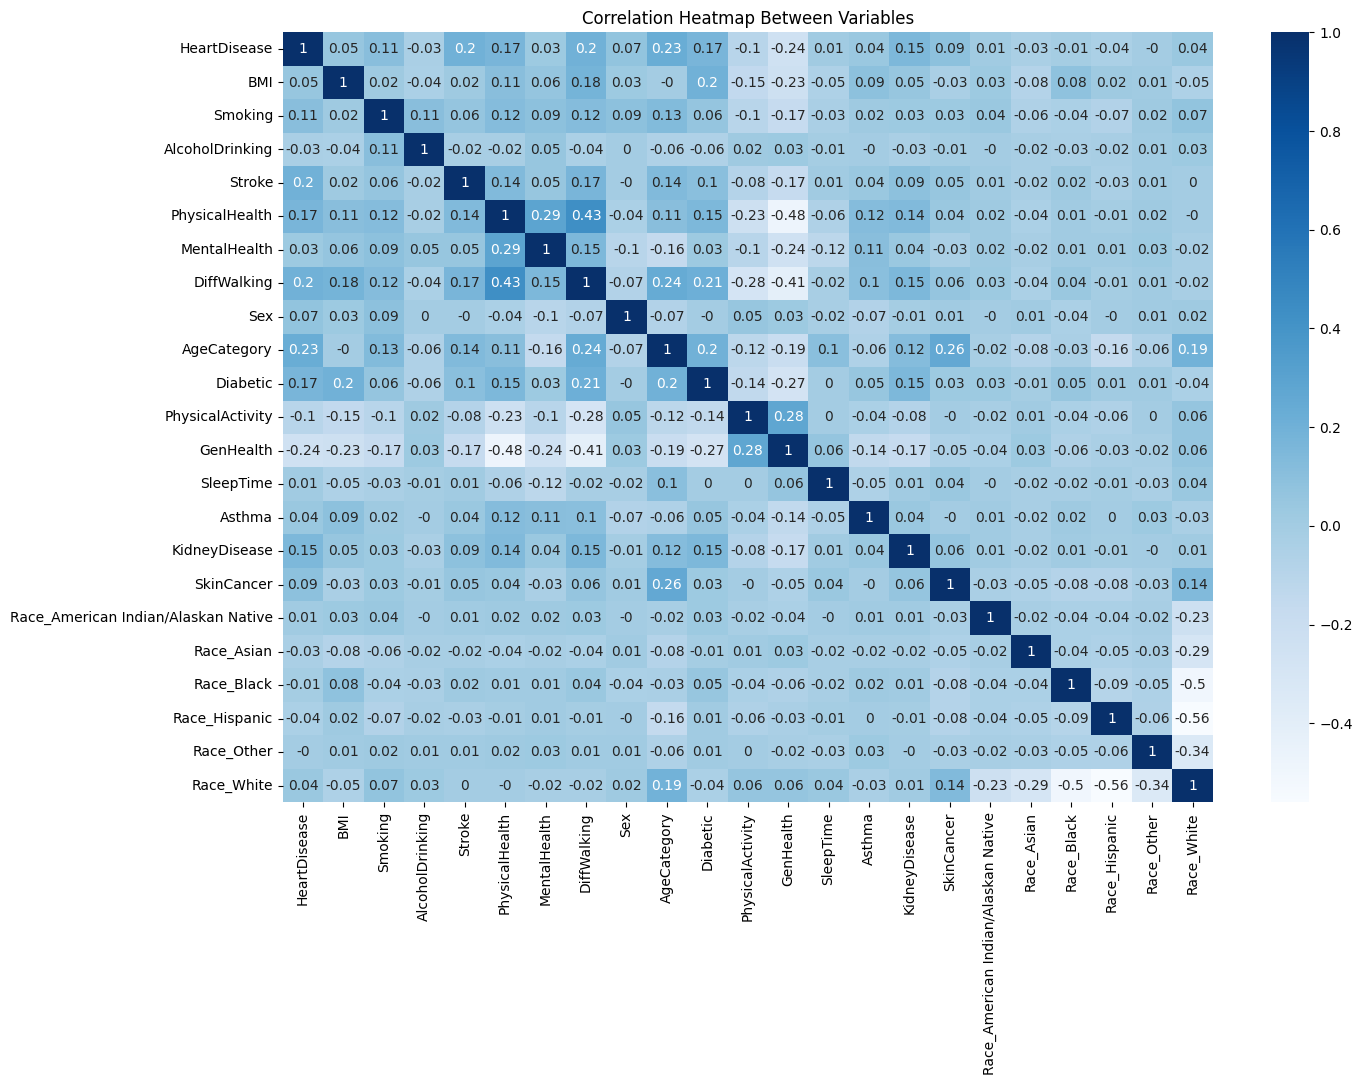

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

# Copying the original DataFrame
transformed_df = asd.copy()

# Calculating correlations
corr_matrix = transformed_df.corr().stack().reset_index(name='correlation')
corr_matrix = corr_matrix[corr_matrix['level_0'] != corr_matrix['level_1']]  # Remove self-correlation
data1=transformed_df
# Creating heatmap
correlation = transformed_df.corr().round(2)
plt.figure(figsize = (15, 10))
sns.heatmap(correlation, annot = True, cmap = 'Blues')
plt.title('Correlation Heatmap Between Variables')

plt.show()

In [186]:
yes_count = asd[asd['HeartDisease'] == 1].shape[0]
no_count = asd[asd['HeartDisease'] == 0].shape[0]

print(yes_count)
print(no_count)

27373
292422


In [187]:
from sklearn.model_selection import train_test_split

x = asd.drop(["HeartDisease"] , axis = 1).values
y = asd["HeartDisease"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 42)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scaling using StandardScaler
st_scaler = StandardScaler()
st_scaler.fit(x_train)
x_train = st_scaler.fit_transform(x_train)
x_test = st_scaler.transform(x_test)

In [188]:
from collections import Counter

class_distribution = Counter(y_train)
print(class_distribution)

Counter({0: 219418, 1: 219418})


In [189]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, classification_report, roc_curve, auc

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

# Evaluating KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)

f1_knn = f1_score(y_test, y_pred_knn, average='macro')
print("F1 Score:", f1_knn)

precision_knn = precision_score(y_test, y_pred_knn, average='macro')
print("Precision:", precision_knn)

recall_knn = recall_score(y_test, y_pred_knn, average='macro')
print("Recall:", recall_knn)

cohen_kappa_knn = cohen_kappa_score(y_test, y_pred_knn)
print("Cohen's Kappa:", cohen_kappa_knn)

y_scores_knn = knn.predict_proba(x_test)[:, 1]

fpr_knn, tpr_knn, threshold = roc_curve(y_test, y_scores_knn)

roc_auc_knn = auc(fpr_knn, tpr_knn)

print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8457516666875133
F1 Score: 0.6181690208587363
Precision: 0.6015067678055677
Recall: 0.6550879624770011
Cohen's Kappa: 0.2418582260900909
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91     73004
           1       0.26      0.42      0.32      6945

    accuracy                           0.85     79949
   macro avg       0.60      0.66      0.62     79949
weighted avg       0.88      0.85      0.86     79949



In [190]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Classifier
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log_reg = log_reg.predict(x_test)

# Evaluating Logistic Regression
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", log_reg_accuracy)

f1_log_reg = f1_score(y_test, y_pred_log_reg, average='macro')
print("F1 Score:", f1_log_reg)

precision_log_reg = precision_score(y_test, y_pred_log_reg, average='macro')
print("Precision:", precision_log_reg)

recall_log_reg = recall_score(y_test, y_pred_log_reg, average='macro')
print("Recall:", recall_log_reg)

cohen_kappa_log_reg = cohen_kappa_score(y_test, y_pred_log_reg)
print("Cohen's Kappa:", cohen_kappa_log_reg)

y_scores_log_reg = log_reg.predict_proba(x_test)[:, 1]

fpr_log_reg, tpr_log_reg, threshold = roc_curve(y_test, y_scores_log_reg)

roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7506785575804575
F1 Score: 0.5978673761289515
Precision: 0.5990705010290219
Recall: 0.7606156535146904
Cohen's Kappa: 0.24905782397623177
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.75      0.85     73004
           1       0.23      0.77      0.35      6945

    accuracy                           0.75     79949
   macro avg       0.60      0.76      0.60     79949
weighted avg       0.91      0.75      0.80     79949



In [191]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

# Evaluating Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", nb_accuracy)

f1_nb = f1_score(y_test, y_pred_nb, average='macro')
print("F1 Score:", f1_nb)

precision_nb = precision_score(y_test, y_pred_nb, average='macro')
print("Precision:", precision_nb)

recall_nb = recall_score(y_test, y_pred_nb, average='macro')
print("Recall:", recall_nb)

cohen_kappa_nb = cohen_kappa_score(y_test, y_pred_nb)
print("Cohen's Kappa:", cohen_kappa_nb)

y_scores_nb = nb.predict_proba(x_test)[:, 1]

fpr_nb, tpr_nb, threshold = roc_curve(y_test, y_scores_nb)

roc_auc_nb = auc(fpr_nb, tpr_nb)

print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.713142128106668
F1 Score: 0.5636555043905573
Precision: 0.5804126527473048
Recall: 0.7233847882493218
Cohen's Kappa: 0.1981275766818522
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.71      0.82     73004
           1       0.19      0.74      0.31      6945

    accuracy                           0.71     79949
   macro avg       0.58      0.72      0.56     79949
weighted avg       0.90      0.71      0.77     79949



In [192]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

# Evaluating Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

f1_dt = f1_score(y_test, y_pred_dt, average='macro')
print("F1 Score:", f1_dt)

precision_dt = precision_score(y_test, y_pred_dt, average='macro')
print("Precision:", precision_dt)

recall_dt = recall_score(y_test, y_pred_dt, average='macro')
print("Recall:", recall_dt)

cohen_kappa_dt = cohen_kappa_score(y_test, y_pred_dt)
print("Cohen's Kappa:", cohen_kappa_dt)

y_scores_dt = dt.predict_proba(x_test)[:, 1]

fpr_dt, tpr_dt, threshold = roc_curve(y_test, y_scores_dt)

roc_auc_dt = auc(fpr_dt, tpr_dt)

print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8593728501919974
F1 Score: 0.5819587159971085
Precision: 0.577803590163934
Recall: 0.5871081997183583
Cohen's Kappa: 0.16425432921159788
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     73004
           1       0.23      0.26      0.24      6945

    accuracy                           0.86     79949
   macro avg       0.58      0.59      0.58     79949
weighted avg       0.87      0.86      0.86     79949



In [193]:
accuracies = {'KNN': knn_accuracy, 'LogisticRegression': log_reg_accuracy, 'NaiveBayes': nb_accuracy, 'DecisionTree': dt_accuracy}
f1s = {'KNN': f1_knn, 'LogisticRegression': f1_log_reg, 'NaiveBayes': f1_nb, 'DecisionTree': f1_dt}
precisions = {'KNN': precision_knn, 'LogisticRegression': precision_log_reg, 'NaiveBayes': precision_nb, 'DecisionTree': precision_dt}
recalls = {'KNN': recall_knn, 'LogisticRegression': recall_log_reg, 'NaiveBayes': recall_nb, 'DecisionTree': recall_dt}
cohen_kappas = {'KNN': cohen_kappa_knn, 'LogisticRegression': cohen_kappa_log_reg, 'NaiveBayes': cohen_kappa_nb, 'DecisionTree': cohen_kappa_dt}

knn_pars = {'Accuracy': knn_accuracy, 'Precision': precision_knn, 'Recall': recall_knn, 'F1': f1_knn, 'Kappa': cohen_kappa_knn}
log_reg_pars = {'Accuracy': log_reg_accuracy, 'Precision': precision_log_reg, 'Recall': recall_log_reg, 'F1': f1_log_reg, 'Kappa': cohen_kappa_log_reg}
nb_pars = {'Accuracy': nb_accuracy, 'Precision': precision_nb, 'Recall': recall_nb, 'F1': f1_nb, 'Kappa': cohen_kappa_nb}
dt_pars = {'Accuracy': dt_accuracy, 'Precision': precision_dt, 'Recall': recall_dt, 'F1': f1_dt, 'Kappa': cohen_kappa_dt}

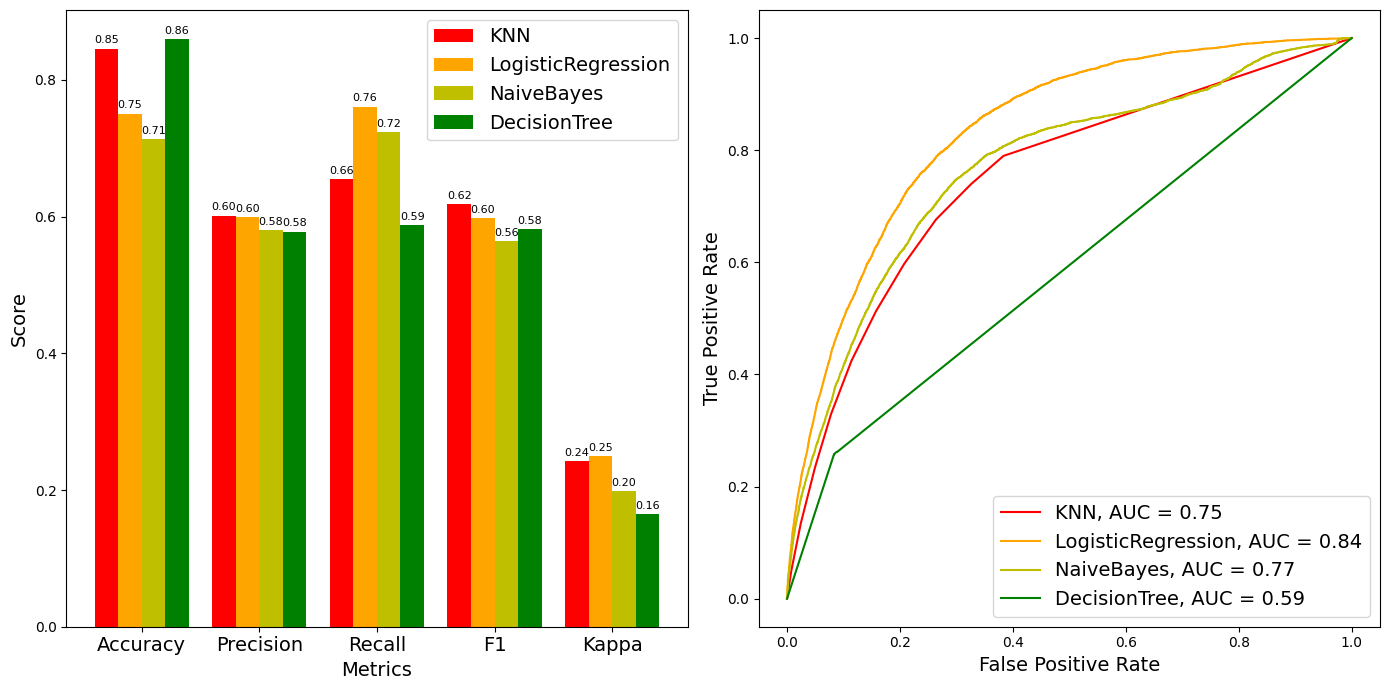

In [200]:
# Create separate pie charts for each sex
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

n_groups = 5

index = np.arange(n_groups)
bar_width = 0.2

axes[0].bar(index, knn_pars.values(), bar_width, label='KNN', color='r')
axes[0].bar(index + bar_width, log_reg_pars.values(), bar_width, label='LogisticRegression', color='orange')
axes[0].bar(index + 2 * bar_width, nb_pars.values(), bar_width, label='NaiveBayes', color='y')
axes[0].bar(index + 3 * bar_width, dt_pars.values(), bar_width, label='DecisionTree', color='g')

for i, v in enumerate(knn_pars.values()):
    axes[0].text(i, v + 0.005, "{:.2f}".format(v), ha='center', va='bottom', fontsize=8)

for i, v in enumerate(log_reg_pars.values()):
    axes[0].text(i + 0.2, v + 0.005, "{:.2f}".format(v), ha='center', va='bottom', fontsize=8)

for i, v in enumerate(nb_pars.values()):
    axes[0].text(i + 0.4, v + 0.005, "{:.2f}".format(v), ha='center', va='bottom', fontsize=8)

for i, v in enumerate(dt_pars.values()):
    axes[0].text(i + 0.6, v + 0.005, "{:.2f}".format(v), ha='center', va='bottom', fontsize=8)

axes[0].set_xlabel('Metrics', fontsize=14)
axes[0].set_ylabel('Score', fontsize=14)
axes[0].set_xticks(index + 0.3, ('Accuracy', 'Precision', 'Recall', 'F1', 'Kappa'), fontsize=14)
axes[0].legend(fontsize=14)

axes[1].plot(fpr_knn, tpr_knn, label='KNN, AUC = {:.2f}'.format(roc_auc_knn), color='r')
axes[1].plot(fpr_log_reg, tpr_log_reg, label='LogisticRegression, AUC = {:.2f}'.format(roc_auc_log_reg), color='orange')
axes[1].plot(fpr_nb, tpr_nb, label='NaiveBayes, AUC = {:.2f}'.format(roc_auc_nb), color='y')
axes[1].plot(fpr_dt, tpr_dt, label='DecisionTree, AUC = {:.2f}'.format(roc_auc_dt), color='g')

axes[1].set_xlabel('False Positive Rate', fontsize=14)
axes[1].set_ylabel('True Positive Rate', fontsize=14)
axes[1].legend(fontsize=14)


plt.tight_layout()
plt.show()